### Name: Emilly Murugi Njue

## **BUSINESS OVERVIEW**

#### INTRODUCTION
SyriaTel is a telecommunications company facing the challenge of customer churn, which refers to customers discontinuing their services or switching to a competitor. To minimize financial losses and improve customer retention, SyriaTel aims to develop a classifier that can predict whether a customer is likely to churn in the near future. By identifying predictable patterns in customer behavior, SyriaTel can implement targeted strategies to retain valuable customers.

#### BUSINESS PROBLEM
The business problem at hand is to build a classifier capable of predicting whether a customer will "soon" stop doing business with SyriaTel. This binary classification problem is crucial for SyriaTel to proactively address customer churn and reduce its financial impact.

#### OBJECTIVES
1. To Develop a binary classification model to predict customer churn for SyriaTel.
2. To Achieve high accuracy in predicting whether a customer will churn or not.
3. To Minimize false predictions of customer churn to avoid unnecessary interventions.
4. To Maximize true predictions of customer churn to enable proactive measures and retention strategies.


In [145]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, mean_squared_error, roc_curve, roc_auc_score, log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")


In [146]:

data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Data Understanding

In [147]:
data.shape

(3333, 21)

In [148]:
#Get the column names
print("Column names: ")
print()
print(data.columns)

Column names: 

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [149]:
# Get unique count for each variable
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [150]:
#Get data types of each column
print("Data types: ")
print()
print(data.dtypes)

Data types: 

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [151]:
# Check for missing values
print("Missing values: ")
print()
print(data.isna().sum())

Missing values: 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [152]:
#Check for duplicated rows
print("Duplicated rows: ", data.duplicated().sum())

Duplicated rows:  0


##### This dataset has no missing values and duplicates.

In [153]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [154]:
#Drop irrelevant columns
data.drop(['phone number', 'account length'], axis=1, inplace=True)
data

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Exploratory Data Analysis

#### Print the list of categorical columns


In [155]:
categorical_columns = data.select_dtypes(include=['object', 'bool'])

print("Categorical Columns:")
for column in categorical_columns:
    print(column)


Categorical Columns:
state
international plan
voice mail plan
churn


In [156]:
#Check unique values in the categorical columns
print("Churn Column values: ")
print()
print(data['churn'].value_counts())
print()
print()

print("Voice Mail Plan Column values: ")
print()
print(data['voice mail plan'].value_counts())
print()
print()

print("International Plan Column values: ")
print()
print(data['international plan'].value_counts())


Churn Column values: 

False    2850
True      483
Name: churn, dtype: int64


Voice Mail Plan Column values: 

no     2411
yes     922
Name: voice mail plan, dtype: int64


International Plan Column values: 

no     3010
yes     323
Name: international plan, dtype: int64


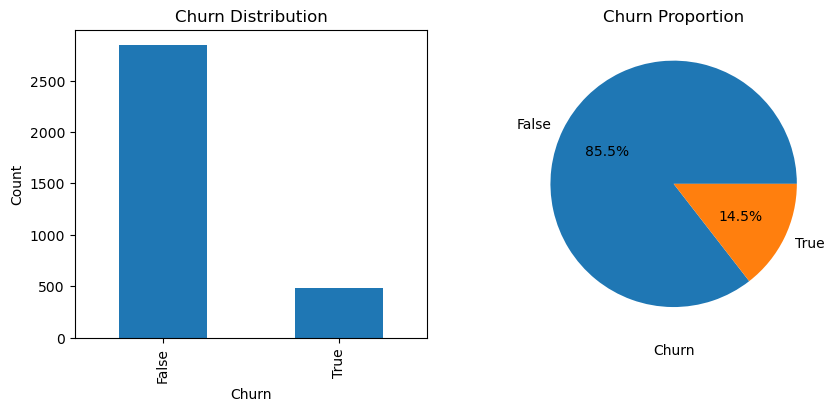

In [157]:
fig, (ax_bar, ax_pie) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

#Bar Chart for churn
churn_counts = data['churn'].value_counts()

churn_counts.plot(kind='bar', ax=ax_bar)
ax_bar.set_xlabel('Churn')
ax_bar.set_ylabel('Count')
ax_bar.set_title('Churn Distribution')

#Pie chart for churn
churn_counts = data['churn'].value_counts()
ax_pie.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%')
ax_pie.set_xlabel('Churn')
ax_pie.set_title('Churn Proportion')

plt.show()


About 15% of the customers have churned.

### Function to visualize the categorical columns

In [158]:
def visualize_column(column):
    column_counts = data[column].value_counts()

    fig, (ax_bar, ax2_bar, ax_pie) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    # Bar chart
    ax_bar.bar(column_counts.index, column_counts.values)
    ax_bar.set_xlabel(column)
    ax_bar.set_ylabel('Count')
    ax_bar.set_xticks([0, 1])
    ax_bar.set_title(f'Distribution of {column}')

    # Bar chart for churn vs. column
    grouped_data = data.groupby([column, 'churn']).size().unstack()
    grouped_data.plot(kind='bar', ax=ax2_bar)
    ax2_bar.set_xlabel(column)
    ax2_bar.set_ylabel('Count')
    ax2_bar.set_xticklabels(grouped_data.index, rotation='horizontal')
    ax2_bar.set_title(f'Churn Distribution by {column}')

    # Pie chart
    ax_pie.pie(column_counts.values, labels=column_counts.index, autopct='%1.1f%%')
    ax_pie.set_xlabel(column)
    ax_pie.set_title(f'Proportion of Customers by {column}')

    plt.tight_layout()
    plt.show()

#### 1. International Plan column

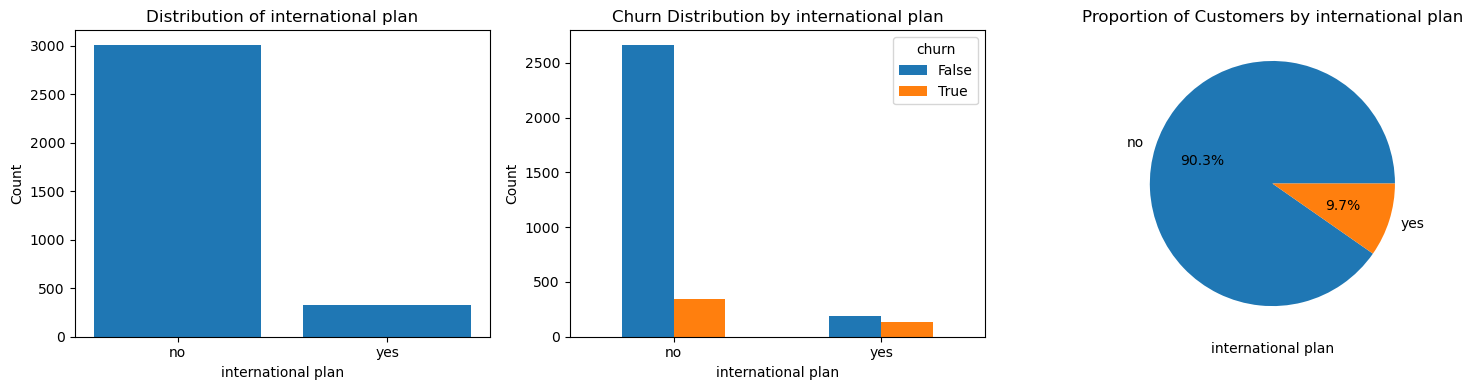

In [159]:
visualize_column('international plan')

#### 
- Customers without the international plan are more (90%) compared to those without the plan (10%).
- On comparing the customer who churned based on whether they had the plan or not, it is seen that those without churn more compared to those with the plan

#### 2. Voice Mail Plan

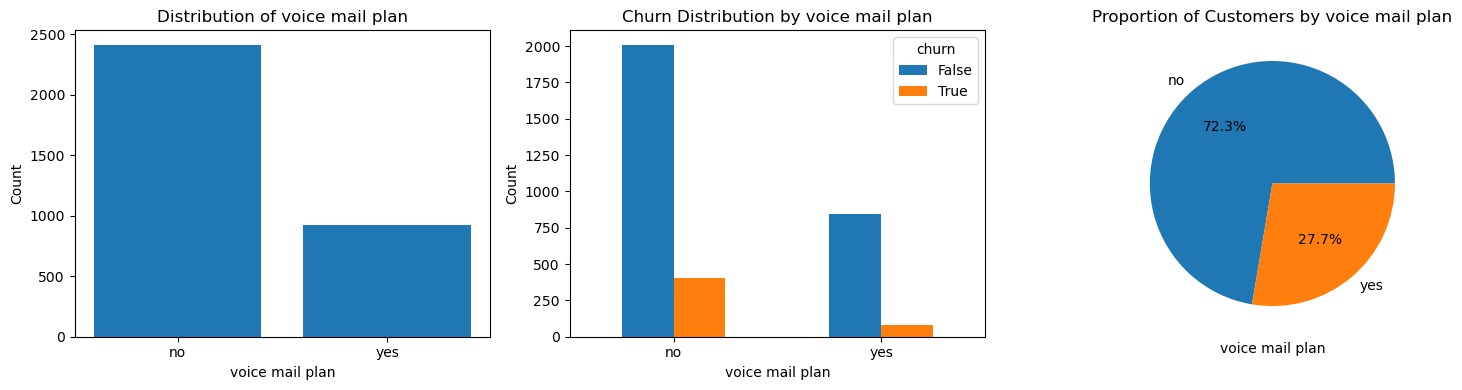

In [160]:
visualize_column('voice mail plan')


#### 
- Few of the customers have subscribed to the voice mail plan (28%).
- It is observed that the customers without the plan churn more compared to the with the voice mail plan.

In [161]:
data.head()

,state,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


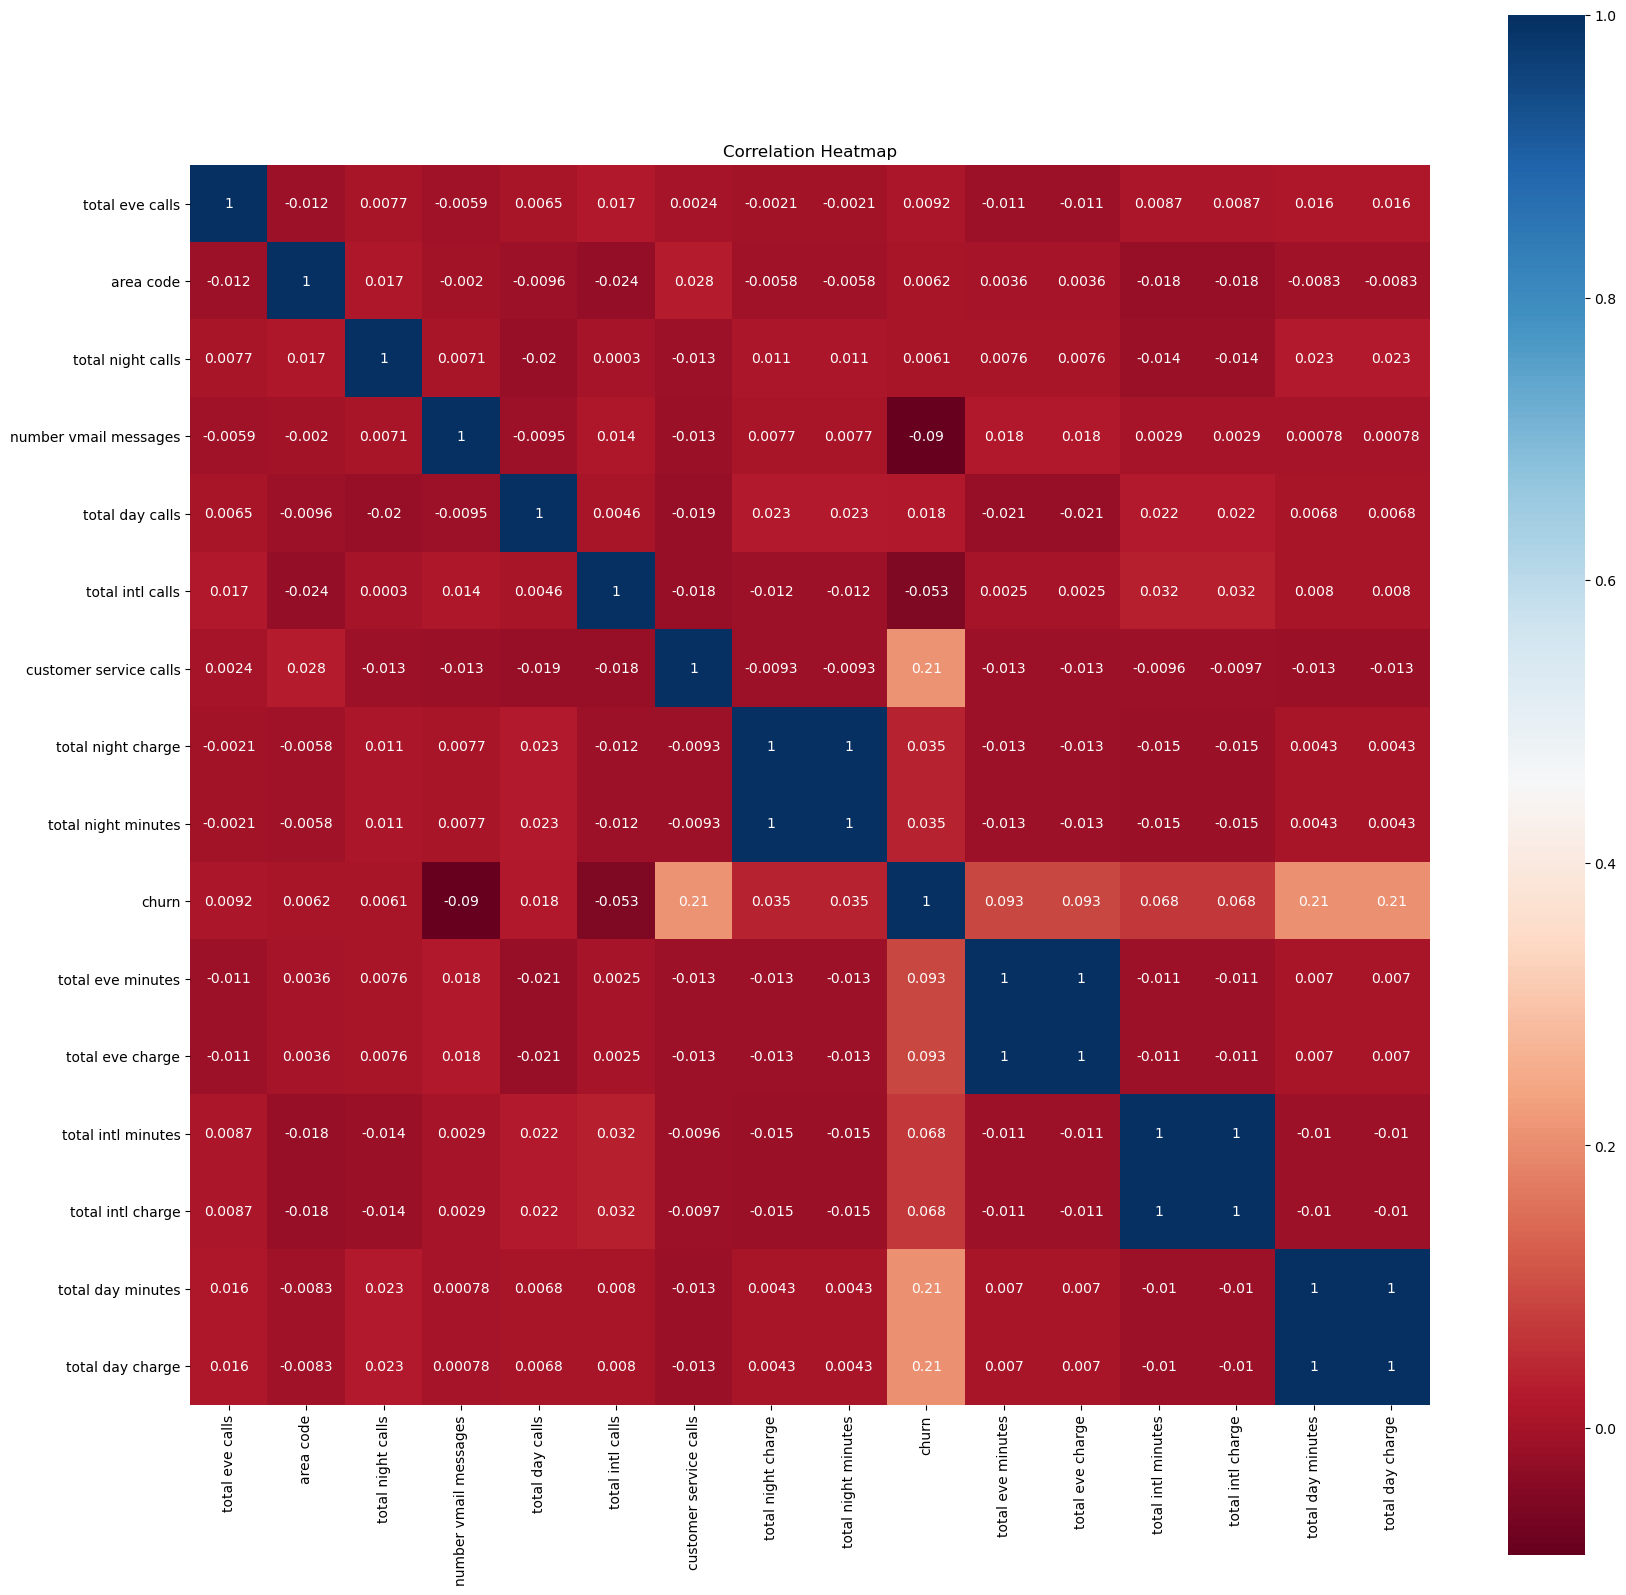

In [162]:
corr_matrix = data.corr()

sorted_columns = corr_matrix.abs().sum().sort_values().index
sorted_corr_matrix = corr_matrix.reindex(index=sorted_columns, columns=sorted_columns)

plt.figure(figsize=(20, 20))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='RdBu', square=True)

plt.title('Correlation Heatmap')
plt.show()



- *international plan* has a positive correlation of 0.259852 with churn.

This shows that customers with an international plan are more likely to churn.

- *customer service calls* has a positive correlation of 0.208750 with churn.
 
This shows that customers who make more customer service calls are more likely to churn.

- *total day minutes* and *total day charge* have positive correlations of 0.205151 with churn.
 
This shows that customers with longer daytime call durations and higher charges are more likely to churn.

- *total eve minutes* and *total eve charge* have smaller positive correlations of 0.092796 and 0.092786, respectively.
 
This shows a weaker relationship between evening call durations/charges and churn.

- *total intl charge* and *total intl minutes* have positive correlations of 0.068259 and 0.068239, respectively.

This shows that customers with higher international call charges and durations are slightly more likely to churn.
 
- *total night charge* and *total night minutes* have smaller positive correlations of 0.035496 and 0.035493, respectively.

This shows a weaker relationship between nighttime call durations/charges and churn.

- *Total Day Calls*, *Total Eve Calls*, *Total Night Calls*, and *Total Intl Calls* have weak correlations (around 0.01) with churn, suggesting that the number of calls made during different times of the day has minimal impact on churn.

- *Area Code* has a very weak positive correlation (0.006) with churn. The area code of the customer's location has a negligible effect on churn.

- *Number Vmail Messages* and *Voice Mail Plan* have weak negative correlations with churn (-0.090 and -0.102, respectively). Customers with more voicemail messages and those who have a voicemail plan are slightly less likely to churn.

#### Select the numerical columns

In [163]:
data_pred = data.iloc[:,5:18]
data_pred.head()

,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


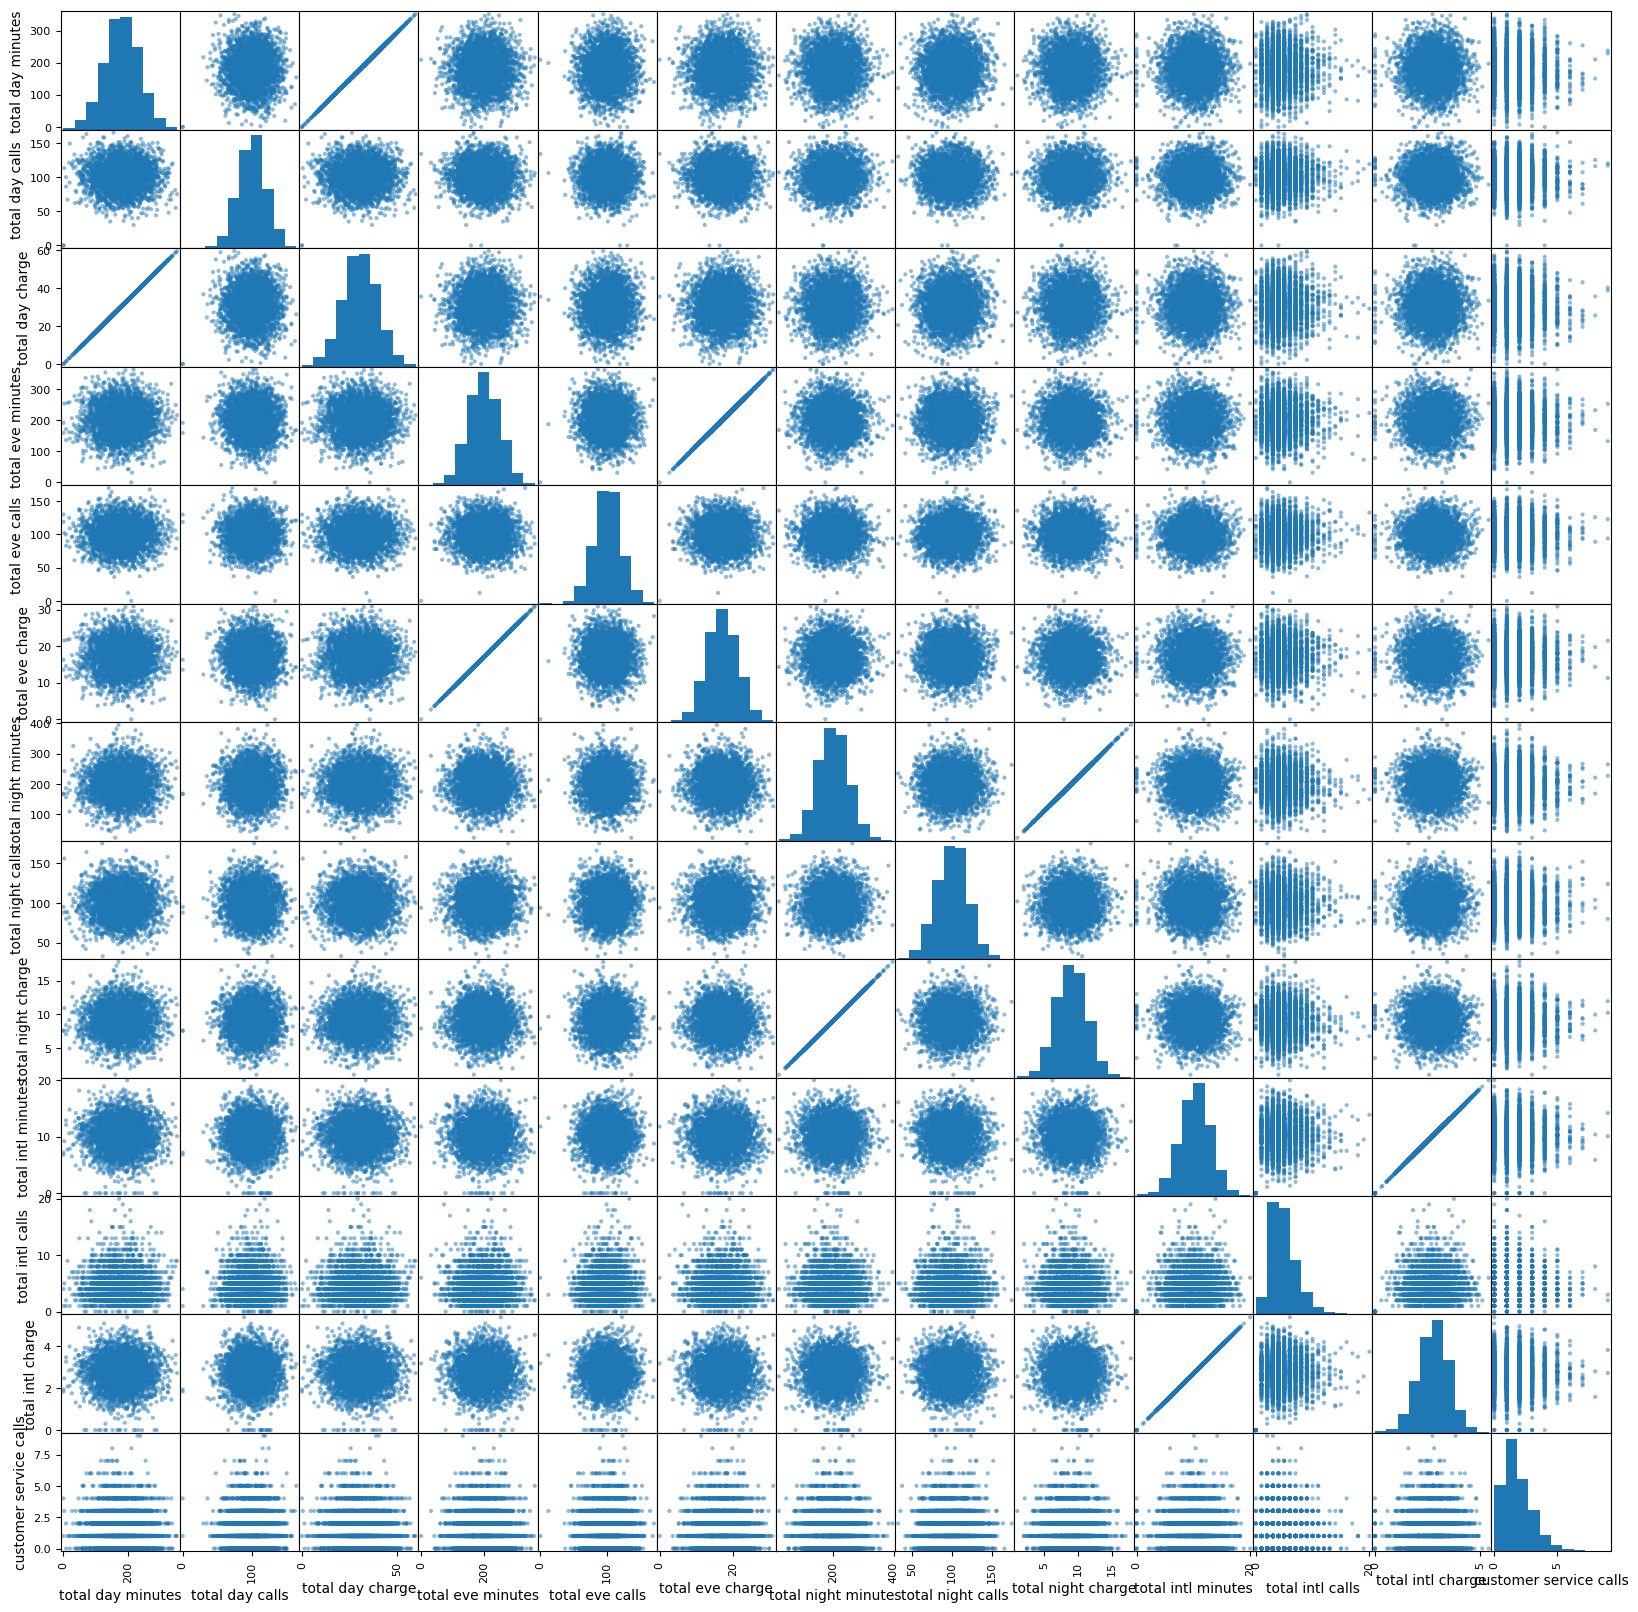

In [164]:
pd.plotting.scatter_matrix(data_pred,figsize  = [20, 20]);
plt.show()

#### Columns that seem to be highly correlated: 
- total day minutes and total day charge. 
- total eve minutes and total eve charge.
- total night minutes and total night charge.
- total intl minutes and total intl charge. 


In [165]:
data_pred.corr()

,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
total day minutes,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288
total night calls,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802
total night charge,0.004300,0.022927,0.004301,-0.012593,-0.002056,-0.012601,0.999999,0.011188,1.000000,-0.015214,-0.012329,-0.015186,-0.009277
total intl minutes,-0.010155,0.021565,-0.010157,-0.011035,0.008703,-0.011043,-0.015207,-0.013605,-0.015214,1.000000,0.032304,0.999993,-0.009640


#### Take 0.75 as a cut-off to check how many high correlations there are.

In [166]:
abs(data_pred.corr()) > 0.75

,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
total day minutes,True,False,True,False,False,False,False,False,False,False,False,False,False
total day calls,False,True,False,False,False,False,False,False,False,False,False,False,False
total day charge,True,False,True,False,False,False,False,False,False,False,False,False,False
total eve minutes,False,False,False,True,False,True,False,False,False,False,False,False,False
total eve calls,False,False,False,False,True,False,False,False,False,False,False,False,False
total eve charge,False,False,False,True,False,True,False,False,False,False,False,False,False
total night minutes,False,False,False,False,False,False,True,False,True,False,False,False,False
total night calls,False,False,False,False,False,False,False,True,False,False,False,False,False
total night charge,False,False,False,False,False,False,True,False,True,False,False,False,False
total intl minutes,False,False,False,False,False,False,False,False,False,True,False,True,False


#### Return only the highly correlated pairs

In [167]:
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

df.columns = ['cc']

df.drop_duplicates(inplace=True)

In [168]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(total day charge, total day minutes)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl minutes, total intl charge)",0.999993


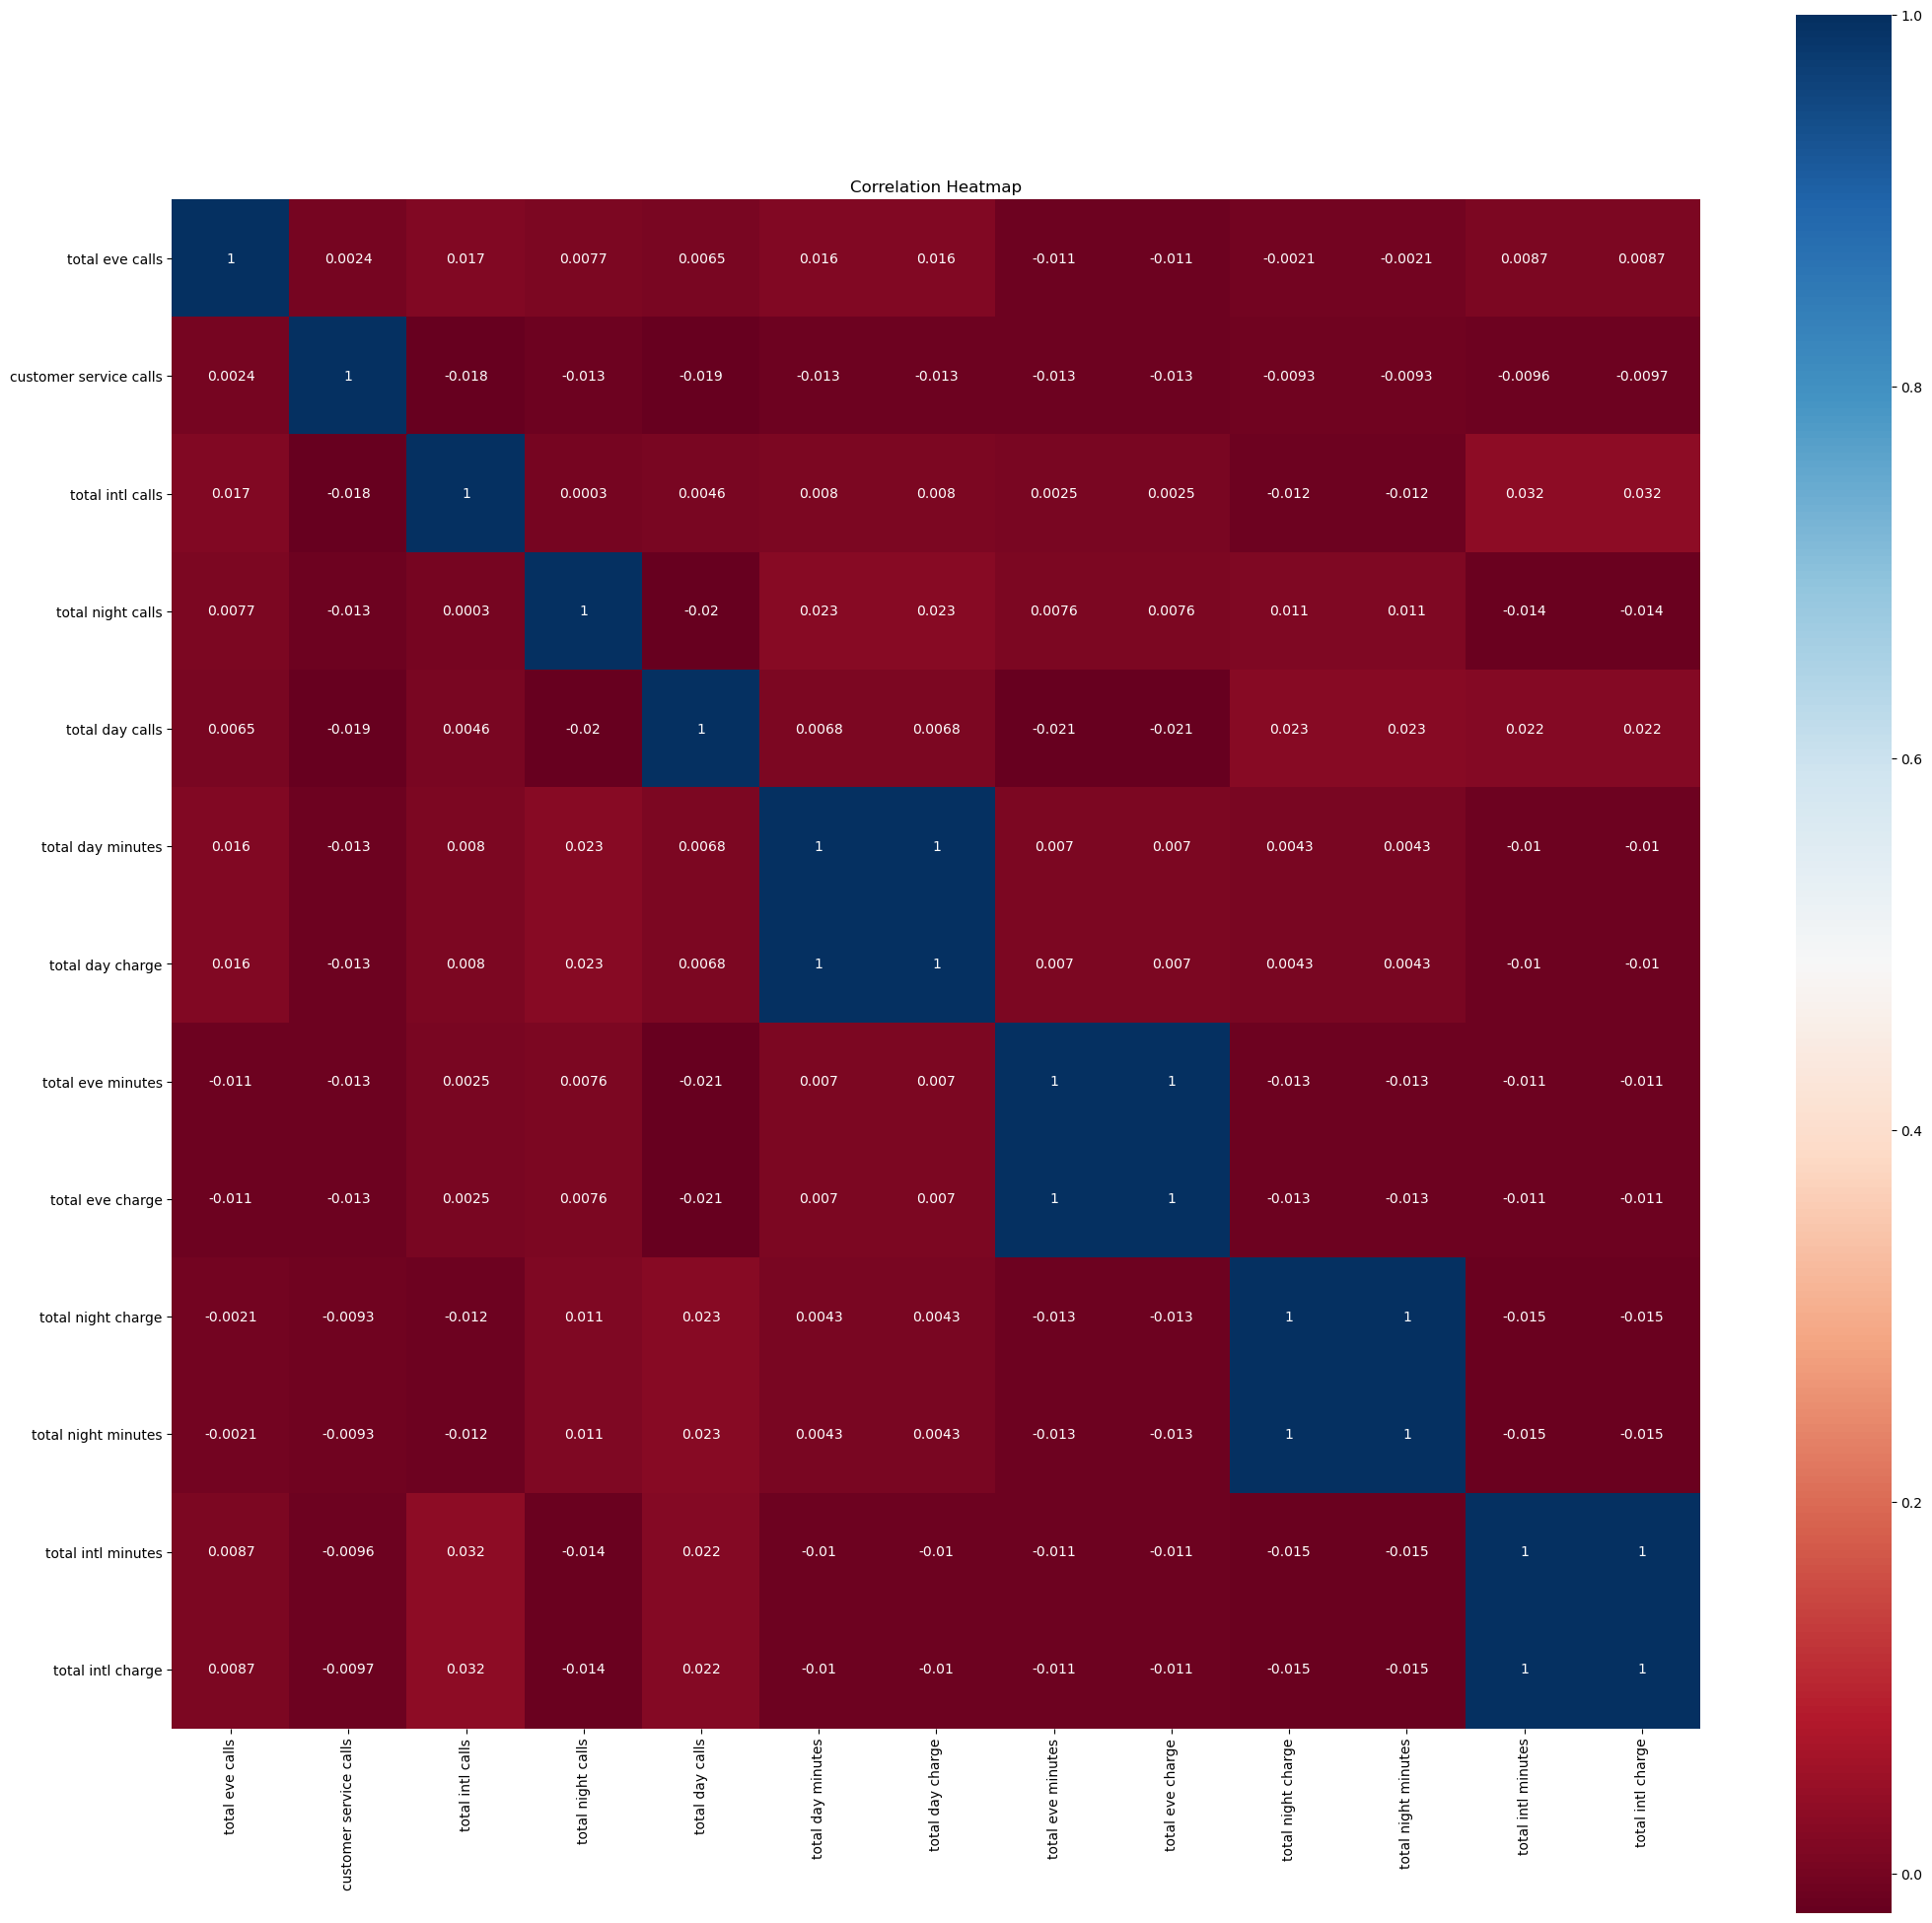

In [169]:
corr_matrix = data_pred.corr()

sorted_columns = corr_matrix.abs().sum().sort_values().index

sorted_corr_matrix = corr_matrix.reindex(index=sorted_columns, columns=sorted_columns)

plt.figure(figsize=(25, 25))
sns.heatmap(sorted_corr_matrix, annot=True, cmap='RdBu', square=True)

plt.title('Correlation Heatmap')
plt.show()


#### Since four different pairs of variables are highly correlated, drop one variable from each pair.


In [170]:
data.drop(columns=['total day minutes', 'total eve minutes','total night minutes', 'total intl minutes'], inplace=True)
data


,state,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,no,yes,36,77,26.55,126,18.32,83,12.56,6,2.67,2,False
3329,WV,415,no,no,0,57,39.29,55,13.04,123,8.61,4,2.59,3,False
3330,RI,510,no,no,0,109,30.74,58,24.55,91,8.64,6,3.81,2,False
3331,CT,510,yes,no,0,105,36.35,84,13.57,137,6.26,10,1.35,2,False


In [171]:
data.corrwith(data['churn']).sort_values(ascending=False).to_frame('Churn')

,Churn
churn,1.000000
customer service calls,0.208750
total day charge,0.205151
total eve charge,0.092786
total intl charge,0.068259
total night charge,0.035496
total day calls,0.018459
total eve calls,0.009233
area code,0.006174
total night calls,0.006141


## Data Preprocessing

#### Convert the categorical columns (Churn, Voice mail plan and International plan) to numerical columns using Scikit Learn OrdinalEncoder

In [172]:
cat_columns = ['international plan', 'voice mail plan', 'churn']

encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(data[cat_columns])

encoded_df = pd.DataFrame(encoded_data, columns=cat_columns)

data[cat_columns] = encoded_df

data

,state,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,415,0.0,1.0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0.0
1,OH,415,0.0,1.0,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0.0
2,NJ,415,0.0,0.0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0.0
3,OH,408,1.0,0.0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0.0
4,OK,415,1.0,0.0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,0.0,1.0,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0.0
3329,WV,415,0.0,0.0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0.0
3330,RI,510,0.0,0.0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0.0
3331,CT,510,1.0,0.0,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0.0


### Convert columns with multiple categories into numerical columns using OneHotEncoder

In [173]:
cat_columns = ["state", "area code"]

ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(data[cat_columns])

new_cat_columns = ohe.get_feature_names_out(cat_columns)

columns = pd.DataFrame(ohe.fit_transform(data[cat_columns]), columns=new_cat_columns, index=data.index)
data = pd.concat([data.drop(cat_columns,axis=1), columns], axis=1)

data

,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,0.0,1.0,25,110,45.07,99,16.78,91,11.01,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,26,123,27.47,103,16.62,103,11.45,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0,114,41.38,110,10.30,104,7.32,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0,71,50.90,88,5.26,89,8.86,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0,113,28.34,122,12.61,121,8.41,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,1.0,36,77,26.55,126,18.32,83,12.56,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3329,0.0,0.0,0,57,39.29,55,13.04,123,8.61,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3330,0.0,0.0,0,109,30.74,58,24.55,91,8.64,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3331,1.0,0.0,0,105,36.35,84,13.57,137,6.26,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [174]:
data.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve calls',
       'total eve charge', 'total night calls', 'total night charge',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA',
       'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS',
       'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI',
       'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND',
       'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC',
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY', 'area code_408',
       'area code

#### Normalization

In [175]:
columns_to_scale = ['number vmail messages','total day calls', 'total day charge', 'total eve calls','total eve charge', 
                    'total night calls', 'total night charge','total intl calls', 'total intl charge', 'customer service calls']

scaler = MinMaxScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data

,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,0.0,1.0,0.490196,0.666667,0.755701,0.582353,0.542866,0.408451,0.595935,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.509804,0.745455,0.460597,0.605882,0.537690,0.492958,0.622236,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,0.690909,0.693830,0.647059,0.333225,0.500000,0.375374,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.000000,0.430303,0.853454,0.517647,0.170171,0.394366,0.467424,0.35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.000000,0.684848,0.475184,0.717647,0.407959,0.619718,0.440526,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,1.0,0.705882,0.466667,0.445171,0.741176,0.592688,0.352113,0.688583,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3329,0.0,0.0,0.000000,0.345455,0.658786,0.323529,0.421870,0.633803,0.452481,0.20,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3330,0.0,0.0,0.000000,0.660606,0.515426,0.341176,0.794241,0.408451,0.454274,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3331,1.0,0.0,0.000000,0.636364,0.609490,0.494118,0.439016,0.732394,0.312014,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [176]:
data.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve calls',
       'total eve charge', 'total night calls', 'total night charge',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA',
       'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS',
       'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI',
       'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND',
       'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC',
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY', 'area code_408',
       'area code

## _______________________________________________________________________________________________________
__________________________________________________________________________________________________________

### Defining X and y
y is the target variable (churn) and everything else is X.

In [177]:
print('Raw counts: \n')
print(data['churn'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(data['churn'].value_counts(normalize=True))

Raw counts: 

0.0    2850
1.0     483
Name: churn, dtype: int64
-----------------------------------
Normalized counts: 

0.0    0.855086
1.0    0.144914
Name: churn, dtype: float64


#### 
It is observed that over 85% of the data is false

In [178]:
y = data['churn']
X = data.drop('churn', axis=1)

### Train-Test Split


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [180]:
X_test.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve calls',
       'total eve charge', 'total night calls', 'total night charge',
       'total intl calls', 'total intl charge', 'customer service calls',
       'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA',
       'state_WI', 'state_WV', 'state_WY', 'area code_408', 'area code_415',
       'a

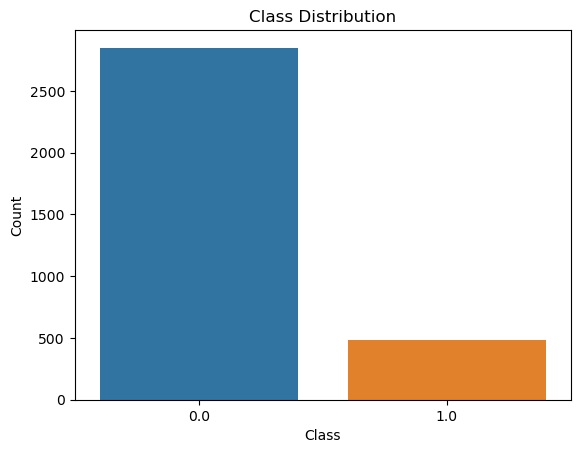

In [181]:
class_counts = y.value_counts()

sns.countplot(x=y)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [182]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2333, 66)
(1000, 66)
(2333,)
(1000,)


In [183]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train) 

## Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train).value_counts()) 

Original class distribution: 

0.0    2850
1.0     483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

1.0    1993
0.0    1993
Name: churn, dtype: int64


In [184]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3986, 66)
(1000, 66)
(3986,)
(1000,)


### Fitting The Baseline Model (Logistic Regression)

### EVALUATION METRICS FUNCTION (Precision, Recall,F1 Score, Accuracy)

In [185]:
def evaluate_model(model, X_train, y_train, X_test, y_test, use_log_loss=True):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Evaluation metrics on training set
    y_pred_train = model.predict(X_train)
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Training Classification Report:")
    print(classification_report(y_train, y_pred_train))
    
    # Evaluation metrics on testing set
    y_pred_test = model.predict(X_test)
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Testing Classification Report:")
    print(classification_report(y_test, y_pred_test))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_test))
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print("Cross-Validation ROC-AUC Scores:", cv_scores)
    print("Mean ROC-AUC:", cv_scores.mean())
    print("Standard Deviation of ROC-AUC:", cv_scores.std())
    
    # Log loss calculation
    if use_log_loss:
        y_pred_proba = model.predict_proba(X_test)
        log_loss_value = log_loss(y_test, y_pred_proba)
        print("Log Loss:", log_loss_value)


#### 1. LogisticRegression

In [186]:
lr = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
baseline_model = lr.fit(X_train, y_train)

print('LogisticRegression')

evaluate_model(baseline_model, X_train, y_train, X_test, y_test)

LogisticRegression
Training Accuracy: 0.791018564977421
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      1993
         1.0       0.79      0.80      0.79      1993

    accuracy                           0.79      3986
   macro avg       0.79      0.79      0.79      3986
weighted avg       0.79      0.79      0.79      3986

Testing Accuracy: 0.771
Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.85       857
         1.0       0.35      0.73      0.48       143

    accuracy                           0.77      1000
   macro avg       0.65      0.76      0.67      1000
weighted avg       0.86      0.77      0.80      1000

Confusion Matrix:
[[666 191]
 [ 38 105]]
Cross-Validation ROC-AUC Scores: [0.84435399 0.84873616 0.84778529 0.84122366 0.85091498]
Mean ROC-AUC: 0.8466028170386926
Standard Deviation of ROC-AUC: 0.003421

- Training Accuracy: 0.791 suggests that the LogisticRegression model achieves an accuracy of 79.1% on the training data.
- Testing Accuracy: 0.771 indicates that the model has an accuracy of 77.1% on the unseen testing data.
- The model exhibits lower precision, recall, and F1-scores for both classes compared to the DecisionTreeClassifier model.
- The confusion matrix shows that the model correctly predicted 666 instances of class 0 (true negatives), incorrectly predicted 191 instances of class 0 as class 1 (false positives), correctly predicted 105 instances of class 1 (true positives), and incorrectly predicted 38 instances of class 1 as class 0 (false negatives).

Cross-Validation ROC-AUC Scores:  The mean ROC-AUC is 0.8466, indicating moderate discriminative power. The standard deviation of ROC-AUC is 0.003421, suggesting relatively low variability in performance across different folds.

Log Loss: The log loss value is 0.5197555273821425, which measures the accuracy of the predicted probabilities. The log loss value is relatively high, suggesting some room for improvement in the probability predictions.

Overall, the Logistic Regression model shows balanced performance on the training set but has limitations on the testing set, particularly in predicting class 1. The cross-validation ROC-AUC scores indicate moderate discriminative power, and the log loss value suggests room for improvement in the probability predictions.

#### 2. DecisionTreeClassifier

In [187]:
clf = DecisionTreeClassifier()
clf_model = clf.fit(X_train, y_train)

print('DesicionTreeClassifier')

evaluate_model(clf_model, X_train, y_train, X_test, y_test)

DesicionTreeClassifier
Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1993
         1.0       1.00      1.00      1.00      1993

    accuracy                           1.00      3986
   macro avg       1.00      1.00      1.00      3986
weighted avg       1.00      1.00      1.00      3986

Testing Accuracy: 0.874
Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92       857
         1.0       0.54      0.76      0.63       143

    accuracy                           0.87      1000
   macro avg       0.75      0.82      0.78      1000
weighted avg       0.90      0.87      0.88      1000

Confusion Matrix:
[[766  91]
 [ 35 108]]
Cross-Validation ROC-AUC Scores: [0.88095238 0.89839863 0.9009112  0.919683   0.92596756]
Mean ROC-AUC: 0.9051825543758893
Standard Deviation of ROC-AUC: 0.0160850655057079


Based on the DecisionTreeClassifier model:

- Training Accuracy: 1.0 indicates that the DecisionTreeClassifier model achieves a perfect accuracy on the training data, correctly classifying all instances.
- Testing Accuracy: 0.87 suggests that the model has an accuracy of 87.5% on the unseen testing data.
- The model shows high precision, recall, and F1-scores for class 0 (not churning) in both the training and testing data. However, it performs relatively poorly in correctly identifying class 1 (churning) instances, as evidenced by the lower precision, recall, and F1-scores for class 1 in the testing classification report.
- The confusion matrix reveals that the model correctly predicted 770 instances of class 0 (true negatives), incorrectly predicted 87 instances of class 0 as class 1 (false positives), correctly predicted 105 instances of class 1 (true positives), and incorrectly predicted 38 instances of class 1 as class 0 (false negatives).

Cross-Validation ROC-AUC Scores: The mean ROC-AUC is 0.9036, indicating moderate performance in terms of the area under the ROC curve. The standard deviation of ROC-AUC is 0.01494, suggesting some variability in performance across different folds.

Log Loss: The log loss value is 4.68567494058523, which measures the accuracy of the predicted probabilities. The log loss value is relatively high, suggesting less accurate probability predictions.

Overall, the Decision Tree Classifier demonstrates perfect performance on the training set but shows some limitations on the testing set, particularly in predicting class 1. The cross-validation ROC-AUC scores indicate moderate discriminative power, and the log loss value suggests some room for improvement in the probability predictions.

#### 3. Random Forest

In [188]:

rf = RandomForestClassifier()
rf_clf = rf.fit(X_train, y_train)

print('Random Forest Classifier')
evaluate_model(rf_clf, X_train, y_train, X_test, y_test)

Random Forest Classifier
Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1993
         1.0       1.00      1.00      1.00      1993

    accuracy                           1.00      3986
   macro avg       1.00      1.00      1.00      3986
weighted avg       1.00      1.00      1.00      3986

Testing Accuracy: 0.928
Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       857
         1.0       0.75      0.75      0.75       143

    accuracy                           0.93      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.93      0.93      0.93      1000

Confusion Matrix:
[[821  36]
 [ 36 107]]
Cross-Validation ROC-AUC Scores: [0.98569104 0.99119658 0.99621856 0.99495598 0.99663102]
Mean ROC-AUC: 0.9929386396559023
Standard Deviation of ROC-AUC: 0.00409935748115


Based on the RandomForestClassifier model:

- Training Accuracy: 1.0 means that the model has achieved a perfect accuracy on the training data, correctly classifying all instances.
- Testing Accuracy: 0.93 indicates that the model has an accuracy of 93.6% on the unseen testing data.
- The model performs very well on both the training and testing data with high precision, recall, and F1-scores for both classes.
- The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives. In this case, the model correctly predicted 830 instances of class 0 (true negatives), incorrectly predicted 27 instances of class 0 as class 1 (false positives), correctly predicted 106 instances of class 1 (true positives), and incorrectly predicted 37 instances of class 1 as class 0 (false negatives).

Cross-Validation ROC-AUC Scores: The mean ROC-AUC is 0.9922, indicating strong performance in terms of the area under the ROC curve. The standard deviation of ROC-AUC is 0.004112, suggesting consistent performance across different folds.

Log Loss: The log loss value is 0.2529837045667498, which measures the accuracy of the predicted probabilities.The log loss value suggests reasonably accurate probability predictions.

Overall, the Random Forest Classifier demonstrates perfect performance on the training set and performs well on the testing set, with slightly lower performance on class 1. The cross-validation ROC-AUC scores and log loss value indicate reliable and reasonably accurate predictions.

#### 4. Gradient Boosting Classifier

In [189]:
gb = GradientBoostingClassifier()
gb_clf = gb.fit(X_train, y_train)

print('Gradient Boosting Classifier')
evaluate_model(gb_clf, X_train, y_train, X_test, y_test)

Gradient Boosting Classifier
Training Accuracy: 0.9518314099347717
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      1993
         1.0       0.97      0.94      0.95      1993

    accuracy                           0.95      3986
   macro avg       0.95      0.95      0.95      3986
weighted avg       0.95      0.95      0.95      3986

Testing Accuracy: 0.935
Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       857
         1.0       0.77      0.77      0.77       143

    accuracy                           0.94      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.93      0.94      0.93      1000

Confusion Matrix:
[[825  32]
 [ 33 110]]
Cross-Validation ROC-AUC Scores: [0.94005063 0.98710973 0.98777093 0.98906185 0.98892961]
Mean ROC-AUC: 0.9785845515793236
Standard Deviation of ROC-AU

Based on the GradientBoostingClassifier model:

- Training Accuracy: 0.9518 indicates that the model has an accuracy of 95.18% on the training data.
- Testing Accuracy: 0.934 indicates that the model has an accuracy of 93.5% on the unseen testing data.
- The model performs well on both the training and testing data with high precision, recall, and F1-scores for both classes.
- The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives. In this case, the model correctly predicted 825 instances of class 0 (true negatives), incorrectly predicted 32 instances of class 0 as class 1 (false positives), correctly predicted 110 instances of class 1 (true positives), and incorrectly predicted 33 instances of class 1 as class 0 (false negatives).

Cross-Validation ROC-AUC Scores: The cross-validation ROC-AUC scores are [0.94016369, 0.98746237, 0.98775204, 0.98891702, 0.98883515]. The mean ROC-AUC is 0.9786260559523392, indicating strong performance in terms of the area under the ROC curve. The standard deviation of ROC-AUC is 0.01923978746839071, suggesting consistent performance across different folds.

Log Loss: The log loss value is 0.24180095749969954, which measures the accuracy of the predicted probabilities. The log loss value suggests reasonably accurate probability predictions.

Overall, the Gradient Boosting Classifier demonstrates good performance on the training set and performs well on the testing set, though with slightly lower performance on class 1. The cross-validation ROC-AUC scores and log loss value indicate reliable and reasonably accurate predictions.


#### 5. XGBoost Classifier

In [190]:
xgb = XGBClassifier()
xgb_clf = xgb.fit(X_train, y_train)

print('XGBClassifier')
evaluate_model(xgb_clf, X_train, y_train, X_test, y_test)

XGBClassifier
Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1993
         1.0       1.00      1.00      1.00      1993

    accuracy                           1.00      3986
   macro avg       1.00      1.00      1.00      3986
weighted avg       1.00      1.00      1.00      3986

Testing Accuracy: 0.947
Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       857
         1.0       0.85      0.76      0.80       143

    accuracy                           0.95      1000
   macro avg       0.91      0.87      0.89      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix:
[[838  19]
 [ 34 109]]
Cross-Validation ROC-AUC Scores: [0.9639952  0.99683883 0.99847609 0.99767005 0.99907432]
Mean ROC-AUC: 0.9912108989997442
Standard Deviation of ROC-AUC: 0.01362868219152104
Log Los

Based on the XGBClassifier model:

- Training Accuracy: 1.0 means that the model has achieved a perfect accuracy on the training data, correctly classifying all instances.
- Testing Accuracy: 0.947 indicates that the model has an accuracy of 94.7% on the unseen testing data.
- The model performs well on both the training and testing data with high precision, recall, and F1-scores for both classes.
- The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives. In this case, the model correctly predicted 838 instances of class 0 (true negatives), incorrectly predicted 19 instances of class 0 as class 1 (false positives), correctly predicted 109 instances of class 1 (true positives), and incorrectly predicted 34 instances of class 1 as class 0 (false negatives).

Cross-Validation ROC-AUC Scores: The cross-validation ROC-AUC scores are [0.9639952, 0.99683883, 0.99847609, 0.99767005, 0.99907432]. The mean ROC-AUC is 0.9912108989997442, indicating strong performance in terms of the area under the ROC curve. The standard deviation of ROC-AUC is 0.01362868219152104, suggesting consistent performance across different folds.

Log Loss: The log loss value is 0.1699, which measures the accuracy of the predicted probabilities. The log loss value suggests accurate probability predictions.

Overall, the XGBClassifier shows excellent performance on the training set with perfect accuracy and performs well on the testing set as well. The cross-validation ROC-AUC scores and low log loss indicate reliable and accurate predictions.

### CHOOSING THE MODEL TO USE

1. Logistic Regression:

The Logistic Regression model has a lower training accuracy (0.791) compared to other models, indicating that it may not fit the training data as well.

It has a relatively lower testing accuracy (0.771) compared to other models, suggesting a lower generalization performance on unseen data.

The F1-score for class 1 is relatively lower (0.48), indicating a lower ability to predict the positive class accurately.

The cross-validation ROC-AUC scores are moderate (mean ROC-AUC: 0.8466), indicating average discriminative ability between classes.

The log loss value (0.5198) is relatively higher compared to other models, indicating less accurate probability predictions.


2. Decision Tree Classifier:

The Decision Tree Classifier has a perfect training accuracy (1.0), indicating overfitting on the training data.

It has a lower testing accuracy (0.87) compared to other models, suggesting less generalization performance.

The F1-score for class 1 is relatively low (0.62), indicating a lower ability to predict the positive class accurately.

The cross-validation ROC-AUC scores are moderate (mean ROC-AUC: 0.9037), indicating average discriminative ability between classes.

The log loss value (4.6857) is significantly higher compared to other models, suggesting less accurate probability predictions.


3. Gradient Boosting Classifier:

The Gradient Boosting Classifier has a relatively higher training accuracy (0.9518) and testing accuracy (0.934).

It has a balanced F1-score for both classes in the testing classification report, indicating good prediction performance for both classes.

The cross-validation ROC-AUC scores are high (mean ROC-AUC: 0.9786), indicating a strong discriminative ability between classes.

The log loss value (0.2418) is relatively lower, indicating more accurate probability predictions compared to other models.


4. XGBoost Classifier:

The XGBoost Classifier has a perfect training accuracy (1.0) and high testing accuracy (0.947).

It has a balanced F1-score for both classes in the testing classification report, indicating good prediction performance for both classes.

The cross-validation ROC-AUC scores are high (mean ROC-AUC: 0.9912), indicating a strong discriminative ability between classes.

The log loss value (0.1699) is relatively lower, indicating accurate probability predictions.


5. Random Forest Classifier:

The Random Forest Classifier has a perfect training accuracy (1.0) and high testing accuracy (0.928).

It has a balanced F1-score for both classes in the testing classification report, indicating good prediction performance for both classes.

The cross-validation ROC-AUC scores are consistently high (mean ROC-AUC: 0.9922), indicating a strong discriminative ability between classes.

The log loss value (0.2529) is relatively lower, indicating accurate probability predictions.

Based on the evaluation metrics, the XGBoost Classifier shows better overall performance with a perfect training accuracy, high testing accuracy, balanced F1-scores for both classes, high cross-validation ROC-AUC scores, and a lower log loss value.

### XGBOOST CLASSIFIER.

In [191]:
xgb = XGBClassifier()
xgb_clf = xgb.fit(X_train, y_train)

print('XGBClassifier')
evaluate_model(xgb_clf, X_train, y_train, X_test, y_test)

XGBClassifier
Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1993
         1.0       1.00      1.00      1.00      1993

    accuracy                           1.00      3986
   macro avg       1.00      1.00      1.00      3986
weighted avg       1.00      1.00      1.00      3986

Testing Accuracy: 0.947
Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       857
         1.0       0.85      0.76      0.80       143

    accuracy                           0.95      1000
   macro avg       0.91      0.87      0.89      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix:
[[838  19]
 [ 34 109]]
Cross-Validation ROC-AUC Scores: [0.9639952  0.99683883 0.99847609 0.99767005 0.99907432]
Mean ROC-AUC: 0.9912108989997442
Standard Deviation of ROC-AUC: 0.01362868219152104
Log Los

In [192]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='roc_auc')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

evaluate_model(best_model, X_train, y_train, X_test, y_test)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Training Accuracy: 0.9997491219267436
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1993
         1.0       1.00      1.00      1.00      1993

    accuracy                           1.00      3986
   macro avg       1.00      1.00      1.00      3986
weighted avg       1.00      1.00      1.00      3986

Testing Accuracy: 0.95
Testing Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       857
         1.0       0.87      0.77      0.81       143

    accuracy                           0.95      1000
   macro avg       0.91      0.87      0.89      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix:
[[840  17]
 [ 33 110]]
Cross-Validation ROC-AUC Scores: [0.96769493 0.9964673  0.99874057 0.99807307 0.99887281]
Mean ROC-AUC: 

After tuning the XGBoost classifier with the given parameters, the best parameter combination is:

- Learning rate: 0.1

- Maximum depth: 7

- Number of estimators: 200

Using these parameters, the model achieved the following performance:

Training Accuracy: 0.9997491219267436

The classification report on the training data shows that the model performs exceptionally well, with high precision, recall, and F1-score for both classes.

Testing Accuracy: 0.95

The classification report on the testing data shows that the model maintains good performance on unseen data. It achieves high precision, recall, and F1-score for the majority class (0) and relatively lower but still acceptable scores for the minority class (1).

The confusion matrix shows that the model makes some false predictions, with 17 false positives and 33 false negatives. However, overall, it performs well in correctly classifying the majority of instances.

The cross-validation ROC-AUC scores indicate that the model has good discriminative ability and performs consistently well across different folds. The mean ROC-AUC is 0.9919, with a standard deviation of 0.01216.

The log loss, which measures the model's confidence in its predictions, is 0.16887. Lower values indicate better performance, and this value suggests that the model's predictions are relatively confident.

Overall, the tuned XGBoost classifier demonstrates excellent performance, with high accuracy, precision, recall, and F1-score. It shows good generalization ability on unseen data and exhibits consistent performance across cross-validation folds.